In [51]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score, auc
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score, classification_report

In [2]:
df = pd.read_csv("../R3_ML_mut_vs_unmut_scripts/mutated_vs_unmutatedCLL.csv")

In [3]:
df_mut_vs_unmut = df[~(df["muation_status"] == "UNK")]
df_mut_vs_unmut_test = df[(df["muation_status"] == "UNK")]

In [4]:
df_mut_vs_unmut = df_mut_vs_unmut.drop("Unnamed: 0", axis=1)
df_mut_vs_unmut = df_mut_vs_unmut.reset_index(drop = True)
df_mut_vs_unmut_test = df_mut_vs_unmut_test.drop("Unnamed: 0", axis=1)
df_mut_vs_unmut_test = df_mut_vs_unmut_test.reset_index(drop = True)

In [5]:
y_train = df_mut_vs_unmut["muation_status"]
X_train = df_mut_vs_unmut.drop("muation_status", axis = 1)


X_test = df_mut_vs_unmut_test.drop("muation_status", axis = 1)

In [6]:
scaler = MinMaxScaler()
columns_to_use = X_train.columns
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = columns_to_use)


X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns = columns_to_use)

In [7]:
indices = np.arange(len(X_train))
np.random.shuffle(indices)
X_trainshuffled = X_train.loc[indices]
y_trainshuffled = y_train.loc[indices]

In [20]:
#number_of_labels = len(list(set(y_train)))
label_encoder = LabelEncoder()
label_encoder.fit(y_trainshuffled)
y_encoded1 = label_encoder.transform(y_trainshuffled)
y_encoded = to_categorical(y_encoded1)
#y_encoded_test = label_encoder.transform(y_test)
label_codes = label_encoder.classes_
for code in label_codes:
    print(code)

M
UM


In [22]:
###M for 0 and UM for 1

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1])

### KNN

In [27]:
k = 3  # Number of neighbors to consider
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_trainshuffled, y_encoded1)

# Make predictions on the test set
y_pred = knn.predict(X_trainshuffled)

# Calculate accuracy
accuracy = accuracy_score(y_encoded1, y_pred)
print("Accuracy: %.2f" % accuracy)

Accuracy: 0.82


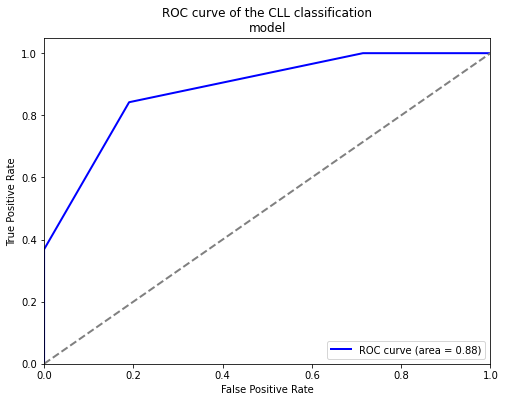

In [32]:
y_prob = knn.predict_proba(X_trainshuffled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_encoded1, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of the CLL classification\nmodel')
plt.legend(loc='lower right')
plt.show()

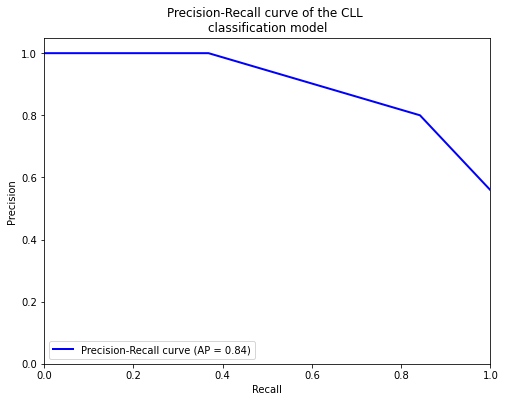

In [35]:
precision, recall, _ = precision_recall_curve(y_encoded1, y_prob)
avg_precision = average_precision_score(y_encoded1, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2, label='Precision-Recall curve (AP = %0.2f)' % avg_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve of the CLL \nclassification model')
plt.legend(loc='lower left')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()



In [36]:
y_pred_test = knn.predict(X_test)

In [37]:
y_pred_test

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1])

In [42]:
model_value= label_encoder.inverse_transform(y_pred_test)

In [55]:
actual_value = np.array(['M', 'UM', 'M', 'UM', 'M', 'M', 'UM', 'UM', 'M', 'UM', 'UM'])
#actual_actual_value = np.array(['M', 'UM', 'M', 'UM', 'M', 'M', 'UM', 'UM', 'UM', 'M', 'UM'])

In [56]:
accuracy = accuracy_score(actual_value, model_value)

In [57]:
accuracy

0.7272727272727273

In [63]:
report = classification_report(actual_value, model_value,output_dict=True)

print("Classification Report:")
print(report)

Classification Report:
{'M': {'precision': 0.6666666666666666, 'recall': 0.8, 'f1-score': 0.7272727272727272, 'support': 5}, 'UM': {'precision': 0.8, 'recall': 0.6666666666666666, 'f1-score': 0.7272727272727272, 'support': 6}, 'accuracy': 0.7272727272727273, 'macro avg': {'precision': 0.7333333333333334, 'recall': 0.7333333333333334, 'f1-score': 0.7272727272727272, 'support': 11}, 'weighted avg': {'precision': 0.7393939393939394, 'recall': 0.7272727272727273, 'f1-score': 0.7272727272727272, 'support': 11}}


In [64]:
pd.DataFrame(report)

,M,UM,accuracy,macro avg,weighted avg
precision,0.666667,0.800000,0.727273,0.733333,0.739394
recall,0.800000,0.666667,0.727273,0.733333,0.727273
f1-score,0.727273,0.727273,0.727273,0.727273,0.727273
support,5.000000,6.000000,0.727273,11.000000,11.000000


In [66]:
report_df = pd.DataFrame(report).transpose()

# Define a function to apply color to the cells based on the values
def color_negative_red(val):
    color = 'red' if val < 0.5 else 'blue'
    return 'color: %s' % color

# Apply the color formatting to the DataFrame
styled_report_df = report_df.style.applymap(color_negative_red, subset=pd.IndexSlice[:, ['precision', 'recall', 'f1-score', 'support']])

# Display the styled classification report
styled_report_df

,precision,recall,f1-score,support
M,0.666667,0.800000,0.727273,5.000000
UM,0.800000,0.666667,0.727273,6.000000
accuracy,0.727273,0.727273,0.727273,0.727273
macro avg,0.733333,0.733333,0.727273,11.000000
weighted avg,0.739394,0.727273,0.727273,11.000000


In [11]:
df_mut_vs_unmut_test_name = df[(df["muation_status"] == "UNK")]

In [13]:
df_mut_vs_unmut_test_name["Unnamed: 0"]

30    Batch_5_110nonanchor1.fcs
31    Batch_5_111nonanchor1.fcs
32     Batch_5_11nonanchor1.fcs
33     Batch_5_12nonanchor1.fcs
34     Batch_5_13nonanchor1.fcs
35     Batch_5_14nonanchor1.fcs
36     Batch_5_15nonanchor1.fcs
37     Batch_5_16nonanchor1.fcs
38     Batch_5_17nonanchor1.fcs
39     Batch_5_18nonanchor1.fcs
40     Batch_5_19nonanchor1.fcs
Name: Unnamed: 0, dtype: object

In [4]:
os.listdir("../R3_ML_mut_vs_unmut_scripts")

['.ipynb_checkpoints',
 'A_differences_in_marker_expression_on_CLL_cells.ipynb',
 'B_wishbone_cd5highcxcr4dim_trajectory.ipynb',
 'clusters_proportion.jpg',
 'clusters_proportions.csv',
 'cluster_index_filename.csv',
 'concattransformed.fcs',
 'concattransformed2.fcs',
 'cytonorm_normalized_untransformed_both',
 'C_markers_differentiate between_mut_and_unmut_CLL.ipynb',
 'D_flowSOM_UMAP.ipynb',
 'EE_proportion_mut_vs_unmut_bar_chart.ipynb',
 'FLOWSOM_clusters.jpg',
 'F_differences_in_marker_expression_in_CLL_cells.ipynb',
 'G_wishbone_cd5highcxcr4dim_trajectory.ipynb',
 'I_flowSOM_UMAP .ipynb',
 'J_playR_proportion_mut_vs_unmut_bar_chart - Copy.ipynb',
 'KNN_mutated_vs_unmutated.ipynb',
 'logistic_regression_mut_vs_unmut.ipynb',
 'mutated_vs_unmutatedCLL.csv',
 'mutation_clusters_proportion.jpg',
 'normalized_mut_vs_unmut.ipynb',
 'playR_clusters_proportions.csv',
 'playR_concattransformed2.fcs',
 'precision_recall_knn.png',
 'precision_recall_svm.png',
 'result.csv',
 'roc_knn.png',
 